In [17]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: 

Data errors: 
MachineID             0
Date                  0
Shift                 0
UnitsProduced         0
Downtime(min)         0
Errors                0
Energy(kWh)           0
OperatorEfficiency    0
dtype: int64
First 5 rows: 
   MachineID        Date      Shift  UnitsProduced  Downtime(min)  Errors  \
0  Machine_A  2025-10-01      Night            131             28       7   
1  Machine_A  2025-10-02  Afternoon            103              2       5   
2  Machine_A  2025-10-03  Afternoon            143             59       4   
3  Machine_A  2025-10-04      Night            128             26       9   
4  Machine_A  2025-10-05    Morning            126             50       6   

   Energy(kWh)  OperatorEfficiency  
0       319.73                0.83  
1       211.28                0.76  
2       323.50                0.86  
3       209.33                0.84  
4       396.65                0.71  
Statistics per Machine for Operator Efficiency: 
           count      mean      

/tmp/ipython-input-3711947730.py:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Shift', y='Errors', data=data, palette='Set2', ax=axs[1,1])


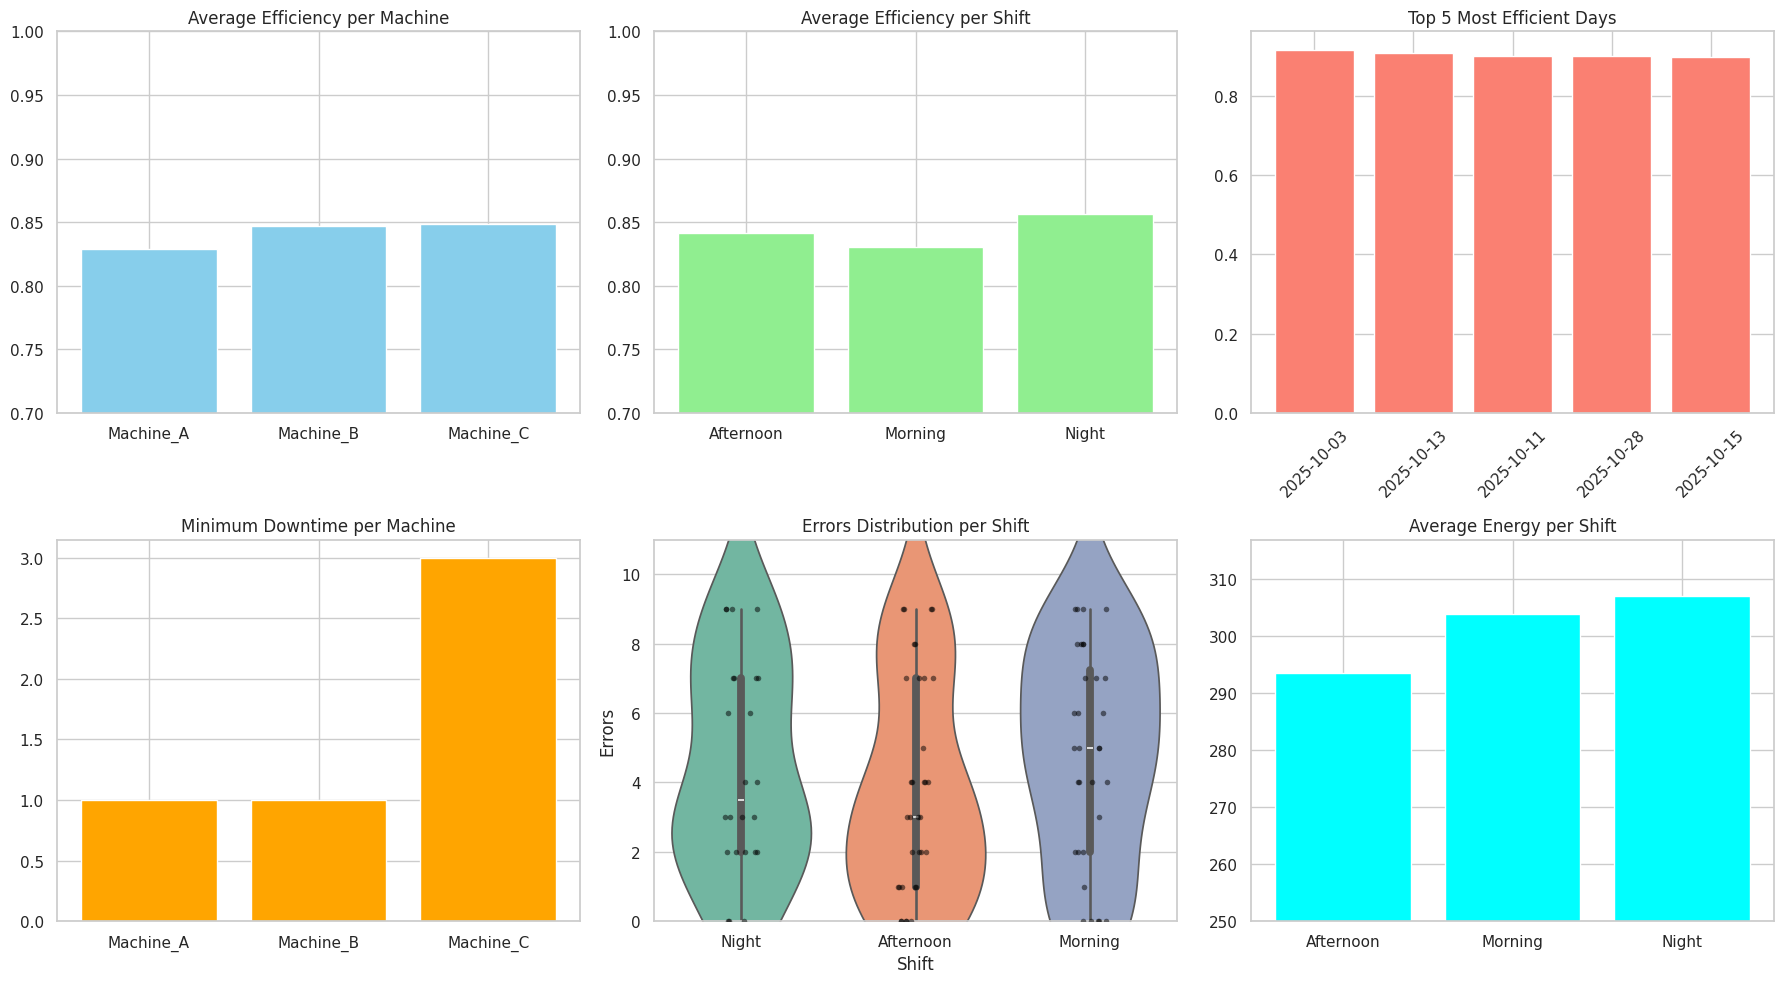

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

data = pd.read_csv('production_efficiency.csv')

print("Data errors: ")
print(data.isnull().sum())

print("First 5 rows: ")
print(data.head())

group = data.groupby('MachineID')['OperatorEfficiency'].describe()
print("Statistics per Machine for Operator Efficiency: ")
print(group)

machine_efficiency = data.groupby('MachineID')['OperatorEfficiency'].mean()
print("Average efficiency by machine: ")
print(machine_efficiency)

best_machine = machine_efficiency.idxmax()
best_value = machine_efficiency.max()
print(f"\nThe most efficient machine is {best_machine} with an average efficiency of {best_value:.3f}")

shift_efficiency = data.groupby('Shift')['OperatorEfficiency'].mean()
best_shift = shift_efficiency.idxmax()
value_shift = shift_efficiency.max()
print(f"\nThe most efficient shift is {best_shift} with an average efficiency of {value_shift:.3f}")

energy_efficiency = data.groupby('Shift')['Energy(kWh)'].mean()
best_energy = energy_efficiency.idxmax()
value_energy = energy_efficiency.max()
print(f"\nThe shift with the highest energy consumption is {best_energy} shift with an average of {value_energy:.3f} kWh")



daily_efficiency = data.groupby('Date')['OperatorEfficiency'].mean()
top5_days = daily_efficiency.sort_values(ascending=False).head(5)
print("Top 5 most efficient dates: ")
print(top5_days)

min_downtime = data.groupby('MachineID')['Downtime(min)'].min()

print("Minimum downtime per machine: ")
print(min_downtime)

best_machine_downtime = min_downtime.idxmin()
best_value_downtime = min_downtime.min()

max_downtime = data.groupby('MachineID')['Downtime(min)'].max()

print("Most downtime per machine: ")
print(max_downtime)

worst_machine_downtime = max_downtime.idxmax()
worst_value_downtime = max_downtime.max()
print(f"\nMachine with the biggest downtime is {worst_machine_downtime} with {worst_value_downtime} minutes")

#diagrams

fig, axs = plt.subplots(2, 3, figsize=(18, 10))


machine_efficiency = data.groupby('MachineID')['OperatorEfficiency'].mean()
axs[0,0].bar(machine_efficiency.index, machine_efficiency.values, color='skyblue')
axs[0,0].set_title('Average Efficiency per Machine')
axs[0,0].set_ylim(0.7,1.0)

shift_efficiency = data.groupby('Shift')['OperatorEfficiency'].mean()
axs[0,1].bar(shift_efficiency.index, shift_efficiency.values, color='lightgreen')
axs[0,1].set_title('Average Efficiency per Shift')
axs[0,1].set_ylim(0.7,1.0)


top5_days = data.groupby('Date')['OperatorEfficiency'].mean().sort_values(ascending=False).head(5)
axs[0,2].bar(top5_days.index.astype(str), top5_days.values, color='salmon')
axs[0,2].set_title('Top 5 Most Efficient Days')
axs[0,2].tick_params(axis='x', rotation=45)


min_downtime = data.groupby('MachineID')['Downtime(min)'].min()
axs[1,0].bar(min_downtime.index, min_downtime.values, color='orange')
axs[1,0].set_title('Minimum Downtime per Machine')


sns.violinplot(x='Shift', y='Errors', data=data, palette='Set2', ax=axs[1,1])

sns.stripplot(x='Shift', y='Errors', data=data, color='black', size=4, jitter=True, alpha=0.5, ax=axs[1,1])
axs[1,1].set_ylim(0, data['Errors'].max() + 2)

axs[1,1].set_title('Errors Distribution per Shift')
axs[1,1].set_xlabel('Shift')
axs[1,1].set_ylabel('Errors')


shift_energy = data.groupby('Shift')['Energy(kWh)'].mean()
axs[1,2].bar(shift_energy.index, shift_energy.values, color='cyan')
axs[1,2].set_title('Average Energy per Shift')


axs[1,2].set_ylim(250, shift_energy.max() + 10)

plt.tight_layout()
plt.show()